In [1]:
import pandas as pd

In [3]:
from skmultilearn.problem_transform import LabelPowerset

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from skmultilearn.adapt import MLKNN

ImportError: cannot import name 'MLKNN' from 'skmultilearn.adapt' (c:\Users\Affognon\.conda\envs\augustin\Lib\site-packages\skmultilearn\adapt\__init__.py)

In [6]:
df = pd.read_csv("dataset-tags.csv")
df.head()

,title,tags,mysql,python,php
0,Flask-SQLAlchemy - When are the tables/databas...,"['python', 'mysql']",1,1.0,0.0
1,Combining two PHP variables for MySQL query,"['php', 'mysql']",1,0.0,1.0
2,'Counting' the number of records that match a ...,"['php', 'mysql']",1,0.0,1.0
3,Insert new row in a table and auto id number. ...,"['php', 'mysql']",1,0.0,1.0
4,Create Multiple MySQL tables using PHP,"['php', 'mysql']",1,0.0,1.0


In [7]:
X = df.drop(columns=['tags']) 
y = df[['tags']]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
from skmultilearn.problem_transform import BinaryRelevance


In [10]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
df.dtypes

title      object
tags       object
mysql       int64
python    float64
php       float64
dtype: object

In [12]:
import pandas as pd
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report
import ast

# Charger le dataset depuis le fichier CSV
data = pd.read_csv('dataset-tags.csv')

data['python'] = df['python'].astype(int)
data['mysql'] = df['mysql'].astype(int)

# Convertir les tags de string à une liste
data['tags'] = data['tags'].apply(ast.literal_eval)


# Vectoriser les titres
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['title'])

# Créer les étiquettes multi-labels
unique_tags = sorted(set(tag for tags in data['tags'] for tag in tags))
y = pd.DataFrame(0, index=data.index, columns=unique_tags)

for i, tags in enumerate(data['tags']):
    for tag in tags:
        y.at[i, tag] = 1

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.28, random_state=42)

# Utilisation de Binary Relevance avec un classificateur Naive Bayes
#classifier = BinaryRelevance(GaussianNB())
classifier = BinaryRelevance(MultinomialNB())

# Entraînement du classificateur
classifier.fit(X_train.toarray(), y_train)

# Prédiction sur l'ensemble de test
y_pred = classifier.predict(X_test.toarray())

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=unique_tags)

print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(report)



Accuracy: 0.8293
Classification Report:
              precision    recall  f1-score   support

       mysql       1.00      1.00      1.00        41
         php       0.95      0.75      0.84        24
      python       0.73      0.94      0.82        17

   micro avg       0.91      0.91      0.91        82
   macro avg       0.89      0.90      0.89        82
weighted avg       0.93      0.91      0.92        82
 samples avg       0.91      0.91      0.91        82



In [ ]:
from sklearn.metrics import hamming_loss


ham = hamming_loss(y_test,y_pred)

In [ ]:
ham

0.11382113821138211

mysql     144
php        82
python     62
dtype: int64


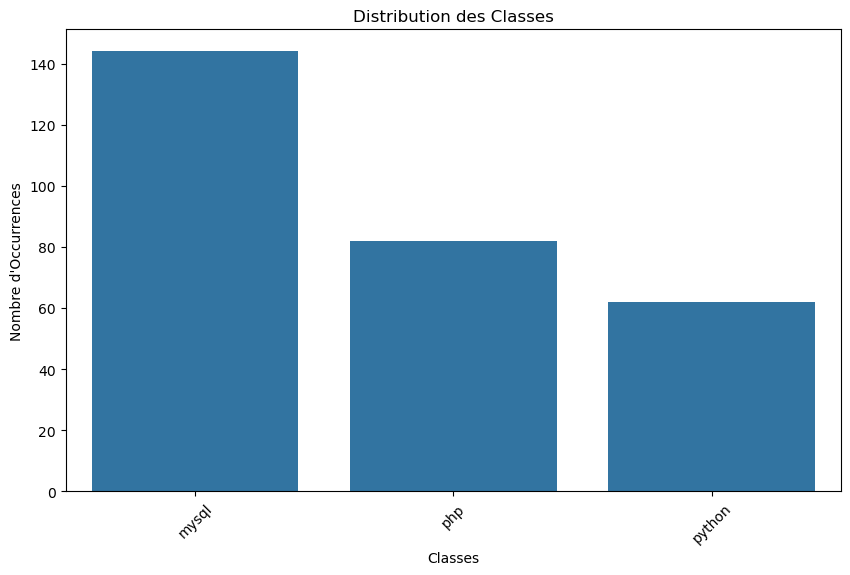

In [13]:

# Analyser la distribution des classes
from matplotlib import pyplot as plt
import seaborn as sns


class_distribution = y.sum().sort_values(ascending=False)
print(class_distribution)

# Visualiser la distribution des classes
plt.figure(figsize=(10, 6))
sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.title('Distribution des Classes')
plt.xlabel('Classes')
plt.ylabel('Nombre d\'Occurrences')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#from sklearn.multioutput import ClassifierChain

#clf_chain = build_model(MultinomialNB(),ClassifierChain,X_train,y_train,X_test,y_test)
#clf_label = build_model(MultinomialNB(),LabelPowerset,X_train,y_train,X_test,y_test)